# Intermediate Python - Week 1

Welcome to the Intermediate Python course!

We will be focussing on getting familiar with Python using examples that you might come across in your day-to-day work.
During this course, you will get familiar with Python for automating data analysis, creating publication-quality graphics,
and we will touch upon machine learning.  We are assuming you are somewhat familiar with Python (or another object-oriented-language),
since we will not cover the basics of syntax and login in as much detail as the beginner course.

The course will be taught primarily through Jupyter notebooks, although it will take the form of an initial introduction from us,
followed by plenty of problem-solving with help from us when required

We will use individual break out rooms to talk through specific problems with one of us.
There will be plenty of content in the notebooks, which you should work through at your own pace during the workshop
sessions.  Anything left over can be completed as homework before the next session.

## Goals for Week 1
_____
* Understand Python's library of external packages
* Introduction to environments and package management
* Gentle introduction to numpy

### Expanding on the standard library: packages, package managers and environments
_____

Python, like many languages, has an extensive library of modules - packaged up python code - that extend it's basic functionality and allows you to use python for many task-specific things without having to reinvent the wheel.  We will make extensive use of these packages in the coming weeks.

We can install external packages using a package manager like `pip` or `conda`, e.g. `pip install numpy` will, by default, install the latest version of numpy it can find.

You can imagine that having lots of packages available to the system python interpreter could get messy! What if two packages require a different version of numpy?

To solve this problem we create isolated environments, where the python interpreter can only access certain packages that we control.  This will be crucial in a few weeks when we start to explore writing your own standaline programs outside of a jupyter notebook.



### A worked useful of external packages - Introduction to NumPy and matplotlib

NumPy (Numerical Python) is Python's <i> de facto <i/> linear algebra package - it provides support for working and operating on matrices.  It introduces the array datatype and associated linear algebra methods for fast matrix computation - think list of lists but much faster!

Let's get some practice with the basics of NumPy and handling array data

In [21]:
import numpy as np

A fundamental (but often overlooked) component of writing code is writing the documentation that goes along with it - all of the modules we will be using have thorough documentation that describes the expected arguments for each function, what it will return and in most cases an example, for example...

In [22]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}, optional
        Specify the memory layout of the array. If object is not an array, the
        newly c

We can initialise an array object in a few ways:
* using `np.arange()`
* using `np.linspace()`
* passing list objects to `np.array()` which can be converted into an array (use nested lists for multi-dimentional lists).
* Initialising an array of arbitrary dimensions where each element is the same  - `np.zeros()`, `np.ones()`


In [10]:
# create a 1D array with 20 elements
# ------------------------------------

# a = np.arange(20)


# now reshape your array to have dimentions 4x5

# a.reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [9]:
# create a 3x3 array from lists:

# b = np.array([[0,1,2],
#               [4,5,6],
#               [7,8,9]])

We can inspect some properties of the arrays we've created, using methods of the array class

In [13]:
# print the shape of the array
print(a.shape)

# print the array's datatype
print(type(b))

# get the internal datatype the array is storing
print(a.dtype.name)


(20,)
<class 'numpy.ndarray'>
int64


#### Fundamental operations on arrays

Now that we know a few ways to initialise arrays, we can think about the operations we can perform on them - in general, we can perform any mathematically valid operation on an array.

In [ ]:
# define two matrices of the same size and add them together

In [ ]:
# define a matrix and apply the sinusoid function to it.  Then print the elementwise square of the result



In [23]:
# TODO: Add some aditional examples here when we check timings

### Indexing, slicing and iterating over matrices

* A one dimentional array can be iterated over in the same way as you could for a regular list object.  
* Indexing and slicing follows a familiar syntax as lists too


In [32]:
# create a one dimentional matrix of at least 10 elements, iterate over it using a `for` loop, printing each value in turn

# now retrieve the 2nd elemtnt of the array same syntax as indexing a list

# print all elements from the 3rd to the end, skipping every second item



In [38]:
# what happens when we try the same things with a two dimentioal array?
# Initialise one using any appropriate method from above, 
a = np.arange(20).reshape(4,5)

# By convention, indexing of 2d arrays is done as [rows, cols]
print(a[1:3, 3:])

# now try iterating over it using the same construct as before, print the result.  Is this what you expected?

[[ 8  9]
 [13 14]]


In [27]:
# If you want to iterate over each element of the matrix, you need to iterate over the .flat attribute.  See if you can print each invididual elemnent of the array you created above

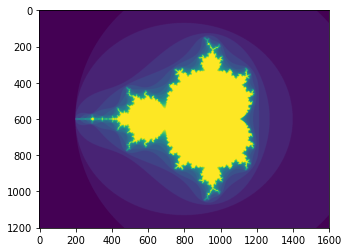

In [41]:
# putting it together

import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime
plt.imshow(mandelbrot(400, 400))
plt.show()